In [6]:
import os
os.chdir('D:/Python/Flies/Yinhe')
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt


In [ ]:
    date_num = len(pd.Series(trade_df.index.date).unique())
    trade_df[' '] = None
    trade_df['名称'] = None
    trade_df.loc[trade_df.index[0], '名称'] = '年化收益率'
    trade_df.loc[trade_df.index[1], '名称'] = '股票本身年化收益率'
    trade_df.loc[trade_df.index[2], '名称'] = '回测开始日期'
    trade_df.loc[trade_df.index[3], '名称'] = '回测结束日期'
    trade_df.loc[trade_df.index[4], '名称'] = '胜率'
    trade_df.loc[trade_df.index[5], '名称'] = '总损益'
    trade_df.loc[trade_df.index[7], '名称'] = '股票名称'
    trade_df.loc[trade_df.index[8], '名称'] = 'date'
    trade_df.loc[trade_df.index[9], '名称'] = 'signal'
    trade_df.loc[trade_df.index[10], '名称'] = 'close'
    trade_df.loc[trade_df.index[11], '名称'] = 'cash'
    trade_df.loc[trade_df.index[12], '名称'] = 'stock_shares'
    trade_df.loc[trade_df.index[13], '名称'] = 'total_capacity'
    trade_df['统计'] = None
    trade_df.loc[trade_df.index[0], '统计'] = trade_df.total_capacity[-1] / trade_df.total_capacity[0] /date_num*365 - 1
    trade_df.loc[trade_df.index[1], '统计'] = trade_df.close[-1] / trade_df.close[0] /date_num*365 - 1
    trade_df.loc[trade_df.index[2], '统计'] = trade_df.index.date[0]
    trade_df.loc[trade_df.index[3], '统计'] = trade_df.index.date[-1]
    trade_df.loc[trade_df.index[4], '统计'] = win_rate
    trade_df.loc[trade_df.index[5], '统计'] = trade_df.total_capacity[-1] - trade_df.total_capacity[0]
    trade_df.loc[trade_df.index[7], '统计'] = stock
    trade_df.loc[trade_df.index[8], '统计'] = '时间（分钟级）'
    trade_df.loc[trade_df.index[9], '统计'] = '交易信号（1：买；-1：卖；0：不交易）'
    trade_df.loc[trade_df.index[10], '统计'] = '每分钟的收盘价'
    trade_df.loc[trade_df.index[11], '统计'] = '现金数额（初始为5,000）'
    trade_df.loc[trade_df.index[12], '统计'] = '持有股份数（每次信号出现时买卖1股，初始为500）'
    trade_df.loc[trade_df.index[13], '统计'] = '交易损益（现金数额 + 持有股份数*当前收盘价）'

    trade_df.to_csv(stock+'输出结果.csv',encoding="utf_8_sig")

In [7]:
for root, dirs, files in os.walk('输出结果csv'):
    pass


In [8]:
files

['688002.XSHG输出结果.csv',
 '688008.XSHG输出结果.csv',
 '688012.XSHG输出结果.csv',
 '688016.XSHG输出结果.csv',
 '688088.XSHG输出结果.csv',
 '688099.XSHG输出结果.csv',
 '688111.XSHG输出结果.csv',
 '688116.XSHG输出结果.csv',
 '688122.XSHG输出结果.csv',
 '688126.XSHG输出结果.csv',
 '688139.XSHG输出结果.csv',
 '688169.XSHG输出结果.csv',
 '688188.XSHG输出结果.csv',
 '688208.XSHG输出结果.csv',
 '688266.XSHG输出结果.csv',
 '688278.XSHG输出结果.csv',
 '688321.XSHG输出结果.csv',
 '688363.XSHG输出结果.csv',
 '688366.XSHG输出结果.csv']

In [9]:
display_name = ['睿创微纳','澜起科技','中微公司','心脉医疗','虹软科技','晶晨股份','金山办公','天奈科技',
                '西部超导','沪硅产业','海尔生物','石头科技','柏楚电子','道通科技','泽璟制药','特宝生物',
                '微芯生物','华熙生物','昊海生科',]

In [10]:
for i in range(len(files)):
# for i in range(1):
    file = files[i]
    display_i = display_name[i]
    trade_df = pd.read_csv('输出结果csv/'+file).set_index('date')
    trade_df.index = pd.to_datetime(trade_df.index)
    date_num = len(pd.Series(trade_df.index.date).unique())
    trade_df.loc[trade_df.index[0], '统计'] = (trade_df.total_capacity[-1] / trade_df.total_capacity[0]  - 1)/date_num*365
    trade_df.loc[trade_df.index[1], '统计'] = (trade_df.close[-1] / trade_df.close[0]  - 1)/date_num*365
    aa = pd.DataFrame(trade_df.iloc[:,5:].reset_index()[[' ','名称','统计']])
    aa.index = trade_df.iloc[::-1,:5].index
    trade_df = pd.concat([trade_df.iloc[::-1,:5],aa], axis = 1)
    trade_df.to_csv('输出结果csv/'+display_i+file,encoding="utf_8_sig")

In [4]:
for i in range(len(files)):
# for i in range(1):
    file = files[i]
    display_i = display_name[i]
    trade_df = pd.read_csv('输出结果csv/'+file).set_index('date')
    trade_df['total_capacity'] -= 300 * trade_df['close']
    trade_df['stock_shares'] -= 300
    fig,ax1 = plt.subplots()
    plt.plot(trade_df.index, trade_df.total_capacity,'b',label="1st")

    plt.grid(True)
    plt.axis('tight')
    plt.xlabel("Index")
    plt.ylabel('Values of 1st')
    plt.title("This is double axis label")

    plt.legend(loc=1)

    ax2=ax1.twinx()
    plt.plot(trade_df.index, trade_df.close,'g',label="2st")
    plt.ylabel("Values of 2st")
    plt.legend(loc=0)

    plt.show()

KeyboardInterrupt: 

In [8]:
    file = files[i]
    display_i = display_name[i]
    trade_df = pd.read_csv('输出结果csv/'+file).set_index('date')
    trade_df['total_capacity'] -= 300 * trade_df['close']
    trade_df['stock_shares'] -= 300
    fig,ax1 = plt.subplots()
    plt.plot(trade_df.index, trade_df.total_capacity,'b',label="1st")

    plt.grid(True)
    plt.axis('tight')
    plt.xlabel("Index")
    plt.ylabel('Values of 1st')
    plt.title("This is double axis label")

    plt.legend(loc=1)

    ax2=ax1.twinx()
    plt.plot(trade_df.index, trade_df.close,'g',label="2st")
    plt.ylabel("Values of 2st")
    plt.legend(loc=0)

    plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000020F7C193798> (for post_execute):


KeyboardInterrupt: 

In [7]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

In [ ]:



fig,ax1 = plt.subplots()
plt.plot(trade_df.index, trade_df.total_capacity,'b',label="1st")

plt.grid(True)
plt.axis('tight')
plt.xlabel("Index")
plt.ylabel('Values of 1st')
plt.title("This is double axis label")

plt.legend(loc=1)

ax2=ax1.twinx()
plt.plot(trade_df.index, trade_df.close,'g',label="2st")
plt.ylabel("Values of 2st")
plt.legend(loc=0)

plt.show()

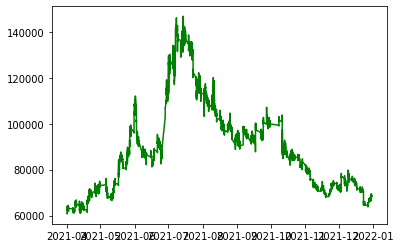

In [88]:
plt.plot(trade_df.index, trade_df.total_capacity,'g',label="2st")

In [85]:
import matplotlib.pylab as plt # 导入绘图包
import matplotlib.pyplot as mp
from pylab import * #图像中的title,xlabel,ylabel均使用中文
import numpy as np

# #使用自己下载的宋体库simsun.ttc，原始matplotlib不支持中文
# myfont = matplotlib.font_manager.FontProperties(fname="simsun.ttc")
# mpl.rcParams['axes.unicode_minus'] = False

# dates,y1 = np.loadtxt('可用于分析.csv', delimiter=',', usecols=(0,1), unpack=True)
# _,y2 = np.loadtxt('可用于分析.csv', delimiter=',', usecols=(0,2), unpack=True)


# mp.gcf().set_facecolor(np.ones(3) * 240/255)#设置背景色
fig, ax1 = plt.subplots() # 使用subplots()创建窗口
ax1.plot(trade_df.index, trade_df.total_capacity,'o-', c='orangered',label='y1', linewidth = 1) #绘制折线图像1,圆形点，标签，线宽
mp.legend(loc=2)
ax2 = ax1.twinx() # 创建第二个坐标轴
ax2.plot(trade_df.index, trade_df.close, 'o-', c='blue',label='y2', linewidth = 1) #同上
mp.legend(loc=1)

ax1.set_xlabel('时间', fontproperties=myfont,size=18)
ax1.set_ylabel('y1', fontproperties=myfont,size=18)
ax2.set_ylabel('y2', fontproperties=myfont,size=18)
# mp.gcf().autofmt_xdate()#自动适应刻度线密度，包括x轴，y轴
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Python\\Flies\\Yinhe\\simsun.ttc'

<Figure size 432x288 with 2 Axes>

In [81]:
trade_df

,signal,close,cash,stock_shares,total_capacity,,名称,统计
date,,,,,,,,
2021-12-30 15:00:00,0,127.03,5273.41,500,68788.41,NaN,年化收益率,0.256765
2021-12-30 14:58:00,0,127.04,-697.00,547,68793.88,NaN,股票本身年化收益率,0.270028
2021-12-30 14:57:00,0,126.98,-697.00,547,68761.06,NaN,回测开始日期,2021-04-01
2021-12-30 14:56:00,0,126.92,-697.00,547,68728.24,NaN,回测结束日期,2021-12-30
2021-12-30 14:55:00,0,126.93,-697.00,547,68733.71,NaN,胜率,0.48846153846153845
...,...,...,...,...,...,...,...,...
2021-04-01 09:35:00,0,111.44,4888.19,501,60719.63,NaN,NaN,NaN
2021-04-01 09:34:00,0,111.65,4888.19,501,60824.84,NaN,NaN,NaN
2021-04-01 09:33:00,0,111.86,4888.19,501,60930.05,NaN,NaN,NaN


In [78]:
file

'688002.XSHG输出结果.csv'

In [72]:
    file = files[i]
    display_i = display_name[i]
    trade_df = pd.read_csv('688169.XSHG输出结果.csv').set_index('date')
    trade_df.index = pd.to_datetime(trade_df.index)
    date_num = len(pd.Series(trade_df.index.date).unique())
    trade_df.loc[trade_df.index[0], '统计'] = (trade_df.total_capacity[-1] / trade_df.total_capacity[0]  - 1)/date_num*365
    trade_df.loc[trade_df.index[1], '统计'] = (trade_df.close[-1] / trade_df.close[0]  - 1)/date_num*365
    aa = pd.DataFrame(trade_df.iloc[:,5:].reset_index()[[' ','名称','统计']])
    aa.index = trade_df.iloc[::-1,:5].index
    trade_df = pd.concat([trade_df.iloc[::-1,:5],aa], axis = 1)

NameError: name 'i' is not defined

In [77]:
trade_df

,signal,close,cash,stock_shares,total_capacity,,名称,统计
date,,,,,,,,
2021-12-30 15:00:00,0,808.31,23633.83,500,427788.83,NaN,年化收益率,-0.527479
2021-12-30 14:58:00,0,806.09,2617.77,526,426621.11,NaN,股票本身年化收益率,-0.596024
2021-12-30 14:57:00,0,806.09,2617.77,526,426621.11,NaN,回测开始日期,2021-04-01
2021-12-30 14:56:00,0,806.28,2617.77,526,426721.05,NaN,回测结束日期,2021-12-30
2021-12-30 14:55:00,0,807.59,2617.77,526,427410.11,NaN,胜率,0.5085950764006791
...,...,...,...,...,...,...,...,...
2021-04-01 09:35:00,0,1161.25,5000.00,500,585625.00,NaN,NaN,NaN
2021-04-01 09:34:00,0,1157.26,5000.00,500,583630.00,NaN,NaN,NaN
2021-04-01 09:33:00,0,1162.68,5000.00,500,586340.00,NaN,NaN,NaN


In [69]:
(trade_df.total_capacity[0] / trade_df.total_capacity[-1]  - 1)/date_num*365

0.7185458318454055

In [67]:
(582745.00/427788.83-1)/date_num*365

0.7185458318454028

,名称,统计
0,年化收益率,0.45621642763054915
1,股票本身年化收益率,0.3876719249917313
2,回测开始日期,2021-04-01
3,回测结束日期,2021-12-30
4,胜率,0.5085950764006791
...,...,...
43970,NaN,NaN
43971,NaN,NaN
43972,NaN,NaN
43973,NaN,NaN


,signal,close,cash,stock_shares,total_capacity,,名称,统计
date,,,,,,,,
2021-12-30 15:00:00,0,808.31,23633.83,500,427788.83,NaN,年化收益率,0.45621642763054915
2021-12-30 14:58:00,0,806.09,2617.77,526,426621.11,NaN,股票本身年化收益率,0.3876719249917313
2021-12-30 14:57:00,0,806.09,2617.77,526,426621.11,NaN,回测开始日期,2021-04-01
2021-12-30 14:56:00,0,806.28,2617.77,526,426721.05,NaN,回测结束日期,2021-12-30
2021-12-30 14:55:00,0,807.59,2617.77,526,427410.11,NaN,胜率,0.5085950764006791
...,...,...,...,...,...,...,...,...
2021-04-01 09:35:00,0,1161.25,5000.00,500,585625.00,NaN,NaN,NaN
2021-04-01 09:34:00,0,1157.26,5000.00,500,583630.00,NaN,NaN,NaN
2021-04-01 09:33:00,0,1162.68,5000.00,500,586340.00,NaN,NaN,NaN


In [24]:
trade_df.sort_index(False)

D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  """Entry point for launching an IPython kernel.


,signal,close,cash,stock_shares,total_capacity,,名称,统计
date,,,,,,,,
2021-04-01 09:31:00,0,1155.49,5000.00,500,582745.00,NaN,年化收益率,0.45621642763054915
2021-04-01 09:32:00,0,1165.12,5000.00,500,587560.00,NaN,股票本身年化收益率,0.3876719249917313
2021-04-01 09:33:00,0,1162.68,5000.00,500,586340.00,NaN,回测开始日期,2021-04-01
2021-04-01 09:34:00,0,1157.26,5000.00,500,583630.00,NaN,回测结束日期,2021-12-30
2021-04-01 09:35:00,0,1161.25,5000.00,500,585625.00,NaN,胜率,0.5085950764006791
...,...,...,...,...,...,...,...,...
2021-12-30 14:55:00,0,807.59,2617.77,526,427410.11,NaN,NaN,NaN
2021-12-30 14:56:00,0,806.28,2617.77,526,426721.05,NaN,NaN,NaN
2021-12-30 14:57:00,0,806.09,2617.77,526,426621.11,NaN,NaN,NaN


In [6]:
trade_df = pd.read_csv('688169.XSHG输出结果.csv').set_index('date')

In [9]:
trade_df.index = pd.to_datetime(trade_df.index)
date_num = len(pd.Series(trade_df.index.date).unique())

In [12]:
trade_df.total_capacity[-1]

427788.8299999996

-0.5960237271821817

-0.5274792245433637

In [11]:
trade_df.total_capacity[-1] / trade_df.total_capacity[0] /date_num*365 - 1

0.45621642763054915

In [5]:
df

,signal,close,cash,stock_shares,total_capacity,,名称,统计
date,,,,,,,,
2021-04-01 09:31:00,0,1155.49,5000.00,500,582745.00,NaN,年化收益率,0.45621642763054915
2021-04-01 09:32:00,0,1165.12,5000.00,500,587560.00,NaN,股票本身年化收益率,0.3876719249917313
2021-04-01 09:33:00,0,1162.68,5000.00,500,586340.00,NaN,回测开始日期,2021-04-01
2021-04-01 09:34:00,0,1157.26,5000.00,500,583630.00,NaN,回测结束日期,2021-12-30
2021-04-01 09:35:00,0,1161.25,5000.00,500,585625.00,NaN,胜率,0.5085950764006791
...,...,...,...,...,...,...,...,...
2021-12-30 14:55:00,0,807.59,2617.77,526,427410.11,NaN,NaN,NaN
2021-12-30 14:56:00,0,806.28,2617.77,526,426721.05,NaN,NaN,NaN
2021-12-30 14:57:00,0,806.09,2617.77,526,426621.11,NaN,NaN,NaN


In [5]:
import os
os.chdir('D:/Python/Flies/Yinhe')
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

class triply_filter:
    def __init__(self, stock):
        self.stock = stock
        self.data_df = self.get_csv_data()
    def get_csv_data(self):
        """
        给定股票，获取给股票2020-10-01之后的分钟数据：开盘价，收盘价，最高价，最低价
        在获取macd后截去前面的数据，只保留2021-03-01之后的数据
        数据来自joinquant，从2020/1/2开盘到2021/12/30收盘
        open_df等csv文件dataframe列为stock代码，行为分钟级时间，value为开盘价
        最后生成的data_df为某只股票的分钟级数据，列为开盘收盘最高最低价，以及macd数据，行为分钟级数据，value为对应的值
        """
        stock = self.stock
        open_df = pd.read_csv('dataset/KC50/open_sum.csv').set_index('date')
        close_df = pd.read_csv('dataset/KC50/close_sum.csv').set_index('date')
        high_df = pd.read_csv('dataset/KC50/high_sum.csv').set_index('date')
        low_df = pd.read_csv('dataset/KC50/low_sum.csv').set_index('date')
        open_df.index = pd.to_datetime(open_df.index)
        close_df.index = pd.to_datetime(close_df.index)
        high_df.index = pd.to_datetime(high_df.index)
        low_df.index = pd.to_datetime(low_df.index)
        data_df = pd.DataFrame(index = close_df.index)
        data_df['open'] = open_df[stock]
        data_df['close'] = close_df[stock]
        data_df['high'] = high_df[stock]
        data_df['low'] = low_df[stock]
        data_df = data_df[data_df.index >= pd.to_datetime('2020-10-01')]
        data_df['date_date'] = data_df.index.date
        
        def macd_generator(time_delta) : 
            """
            由收盘价获取不同时间周期time_delta下的macd数据
            首先计算EMA指数平均数指标，再通过EMA计算MACD
            生成新的MACD列添加到data_df中
            由于EMA的计算需要用到过去的EMA数据，
            这里从2020-10-01开始计算EMA并会在最后截取2021-03-01之后的结果以保证尽可能小的消除初始值的影响
            input: 时间周期time_delta，由于60d和15d两个滤网需要用到macd数据，这里time_delta在之后会取60和15
            """
            data_df['ema_30'] = data_df['close']
            data_df['ema_50'] = data_df['close']
            data_df['ema_9'] = data_df['close']
            for i in range(time_delta, len(data_df)) : 
                data_df.loc[data_df.index[i],'ema_30'] = (2*data_df['close'].iloc[i] + (30-1)*data_df['ema_30'].iloc[i-time_delta]) / (30+1)
                data_df.loc[data_df.index[i],'ema_50'] = (2*data_df['close'].iloc[i] + (50-1)*data_df['ema_50'].iloc[i-time_delta]) / (50+1)
                data_df.loc[data_df.index[i],'ema_9'] = (2*data_df['close'].iloc[i] + (9-1)*data_df['ema_9'].iloc[i-time_delta]) / (9+1)
            a,b,c = 9,30,50    
            data_df['macd_'+str(time_delta)] = (-(a-1)/(a-b) + (a-1)/(a-c))*2 * data_df['ema_9'] + \
                2*(1 + (b-1)/(a-b)) * data_df['ema_30'] + 2*(-1 - (c-1)/(a-c)) * data_df['ema_50']   
        macd_generator(60)
        macd_generator(15)
        data_df = data_df[data_df.index >= pd.to_datetime('2021-03-01')] # 取2021-03-01之后的结果以保证尽可能小的消除EMA初始值的影响
        return data_df
    
    def get_data(self, query_time, time_delta, type_ = 'close'):
        """
        func: 仿照箱线图，给定一个时间段，获取该时间段内的开盘收盘价，最高最低价，
            从而起到获取不同时间周期下的开盘收盘价，最高最低价的作用。
            给定股票，开始时间，时间间隔，返回过去time_delta分钟里的close,open,high,low
        input: query_time: '2016-01-04 09:32:00', 
            time_delta: int
        """
        if type_ == 'open' : 
            return self.data_df.loc[query_time - pd.Timedelta(str(time_delta - 1) + 'minutes'), 'open']
        if type_ == 'close' : 
            return self.data_df.loc[query_time, 'close']
        if type_ == 'high' : 
            return self.data_df.loc[query_time - pd.Timedelta(str(time_delta - 1) + 'minutes'): query_time, 'high'].max()
        if type_ == 'low' : 
            return self.data_df.loc[query_time - pd.Timedelta(str(time_delta - 1) + 'minutes'): query_time, 'low'].min()    
    def signal_1(self) : 
        """
        第一个信号指标的计算。
        在60分钟上，计算MACD(30,50,9)，大于0则BK1=1、SK1=0；否则BK1=0、SK1=1。
        由于BK和SK成对出现，这里只考虑BK，之后的signal方法同理
        """
        signal_df = pd.DataFrame(self.data_df.macd_60 , index = self.data_df.index)
        signal_df['bk1'] = None
        signal_df.loc[signal_df['macd_60']>0,'bk1'] = 1
        signal_df.loc[signal_df['macd_60']<0,'bk1'] = 0
        return signal_df[['bk1']]

    def signal_2(self): 
        """
        第二个信号指标的计算。
        在15分钟上，若最近一次为底分型，其右K线收盘价高于前一次底分型的右K线收盘价（股价不创新低），
        或虽然其右K线收盘价低于前一次底分型的右K线收盘价，但MACD(30,50,9)柱线高于上次（底背离），则BK2=1、SK2=0；
        反之若最近一次为顶分型，其右K线收盘价低于前一次顶分型的右K线收盘价（股价不创新高），
        或虽然其右K线收盘价高于前一次顶分型的右K线收盘价，但MACD(30,50,9)柱线低于上次（顶背离），则BK2=0、SK2=1。
        """
        signal_df = pd.DataFrame(self.data_df.macd_15 , index = self.data_df.index)
        signal_df['date'] = signal_df.index
        signal_df['close'] = signal_df['date'].apply(self.get_data, args = (15,'close'))
        signal_df['high'] = signal_df['date'].apply(self.get_data, args = (15,'high'))
        signal_df['low'] = signal_df['date'].apply(self.get_data, args = (15,'low'))

        signal_df['type'] = None
        for i in range(15,len(signal_df)) : 
            if signal_df['high'][i-15] > signal_df['high'][i] and signal_df['high'][i-15] > signal_df['high'][i-30] and\
                       signal_df['low'][i-15] > signal_df['low'][i] and signal_df['low'][i-15] > signal_df['low'][i-30] :

                signal_df.loc[signal_df.index[i],'type'] = 'top'

            elif signal_df['high'][i-15] < signal_df['high'][i] and signal_df['high'][i-15] < signal_df['high'][i-30] and\
                         signal_df['low'][i-15] < signal_df['low'][i] and signal_df['low'][i-15] < signal_df['low'][i-30] :

                signal_df.loc[signal_df.index[i],'type'] = 'bot'

        signal_df = signal_df.reset_index(drop=True)
        signal_df['bk2'] = None
        for i in range(15) : 

            tmp_df = signal_df[signal_df.index % 15 == i]
            tmp_df = tmp_df.copy()

            bot_df = tmp_df[tmp_df['type']=='bot']
            buy_df = bot_df[(bot_df['close'].diff()>0) | (bot_df['macd_15'].diff()>0)]
            tmp_df.loc[buy_df.index, 'bk2'] = 1

            bot_df = tmp_df[tmp_df['type']=='top']
            sell_df = bot_df[(bot_df['close'].diff()<0) | (bot_df['macd_15'].diff()<0)]
            tmp_df.loc[sell_df.index, 'bk2'] = 0

            tmp_df['bk2'] = tmp_df['bk2'].fillna(method='ffill')


            signal_df.loc[tmp_df.index,'bk2'] = tmp_df['bk2']
        signal_df = signal_df.set_index('date')
        return signal_df[['bk2']]

    def signal_3(self, m):
        """
        第三个信号指标的计算。
        在4分钟上，若最高价高于前一根K线最高价*(1+常数参数m)，则BK3=1、SK3=0；
        若最低价低于前一根K线最低价-常数参数m，则BK3=0、SK3=1
        """
        signal_df = pd.DataFrame(self.data_df.macd_15 , index = self.data_df.index)
        signal_df['date'] = signal_df.index
        signal_df['high'] = signal_df['date'].apply(self.get_data, args = (4,'high'))
        signal_df['low'] = signal_df['date'].apply(self.get_data, args = (4,'low'))

        signal_df['bk3'] = None

        def inner_func(i,m):
            i = signal_df.index.get_loc(i)
            if signal_df['high'][i] > signal_df['high'][i-4]*(1 + m) :
                return 1
            elif signal_df['low'][i] < signal_df['low'][i-4]*(1 - m) :
                return 0
        signal_df['bk3'] = signal_df['date'].apply(inner_func, args = (m,))

        return signal_df[['bk3']]
    
    def train_func(self, time_begin = '2021-04-01', time_end = '2021-11-01') : 
        """
        对4月到10月的历史数据进行回测，找出最优的m参数值，
        函数整体与trade_func比较接近
        input: time_begin/time_end: 回测开始时间/结束时间，形如'2020-01-01' str
        """
        m_list = []
        signal_df_1 = self.signal_1()
        signal_df_2 = self.signal_2()
        test_list = [0, 0.002, 0.004, 0.006, 0.008, 0.012, 0.014, 0.016, 0.018]
        for m in  test_list: 
            signal_df_3 = self.signal_3(m)
            # 将三种信号合并到一张dataframe上，对于bk全为1的设置交易信号为买入1，反之为卖出信号0
            signal_df = pd.concat([signal_df_1,signal_df_2,signal_df_3], axis=1)
            buy_df = signal_df[(signal_df['bk1']==1)&(signal_df['bk2']==1)&(signal_df['bk3']==1)]
            sell_df = signal_df[(signal_df['bk1']==0)&(signal_df['bk2']==0)&(signal_df['bk3']==0)]
            capacity = pd.DataFrame(index = signal_df.index)
            capacity['signal'] = 0
            capacity.loc[buy_df.index,'signal'] = 1
            capacity.loc[sell_df.index,'signal'] = -1
            capacity = capacity[capacity.index >= pd.to_datetime(time_begin)] # 只选用2021-04-01起的数据
            capacity = capacity[capacity.index <= pd.to_datetime(time_end)] # 只选用2021-11-01终了的数据，留出m的验证集数据
            # 构建交易回测记录，每min循环，每日平仓
            capacity['close'] = self.data_df['close']
            capacity['cash'] = 0   # 现金
            capacity['stock_shares'] = 0   # 持有股份数
            capacity['delta_change'] = 0   # 计算胜率用的过程量，初始为0
            capacity['total_capacity'] = 0   # 持股现值+现金
            capacity['date_date'] = capacity.index.date

            grouped = capacity.groupby(by='date_date')
            for key, daily_df in grouped:
                # 每次买卖一手股票
                daily_df['stock_shares'] = 1 * daily_df['signal'] # signal为1时做多，股票数加1；反之减1
                daily_df['cash'] = - daily_df['stock_shares'] * daily_df['close'] # cash变动数为买卖股票数*当前股价，变动方向和股票数方向相反
                daily_df['delta_change'] = daily_df['stock_shares'] * daily_df.iloc[-1]['close'] + daily_df['cash'] 
                # 这笔交易的盈亏取决于当日收盘时平仓情况，记录下这笔交易的盈亏为delta_change

                # 每日平仓
                daily_df.loc[daily_df.index[-1], 'stock_shares'] = - daily_df.loc[daily_df.index[:-1], 'stock_shares'].sum()
                daily_df.loc[daily_df.index[-1], 'cash'] = - daily_df.loc[daily_df.index[-1], 'stock_shares'] * daily_df.loc[daily_df.index[-1], 'close']

                capacity.loc[daily_df.index] = daily_df

            # 将数据cumsum，从变化量调整为总量
            capacity['stock_shares'] = capacity['stock_shares'].cumsum()
            capacity['cash'] = capacity['cash'].cumsum()
            # 设置初始cash和shares
            capacity['stock_shares'] = capacity['stock_shares'] + 500
            capacity['cash'] = capacity['cash'] + 5000
            capacity['total_capacity'] = capacity['cash'] + capacity['stock_shares'] * capacity['close']
            
            m_list.append(capacity['total_capacity'][-1])
        return test_list[m_list.index(max(m_list))]
    
    def trade_func(self, m, time_begin = '2021-11-01', time_end = '2022-01-01'):
        """
        在获取4月到10月间的最优的m参数值后，以它为参数开始计算交易11月到12月的盈亏
        input: m: 需要输入的参数m，可以来自于train_func函数所找到的过去最优m值，也可以手动输入
            time_begin/time_end: 回测开始时间/结束时间，形如'2020-01-01' str
        """

        # 生成60min，15min，4min三种周期下的信号
        signal_df_1 = self.signal_1()
        signal_df_2 = self.signal_2()
        signal_df_3 = self.signal_3(m)
        print(len(signal_df_3[signal_df_3['bk3']==1])/len(signal_df_3))
        # 将三种信号合并到一张dataframe上，对于bk全为1的设置交易信号为买入1，反之为卖出信号0
        signal_df = pd.concat([signal_df_1,signal_df_2,signal_df_3], axis=1)
        buy_df = signal_df[(signal_df['bk1']==1)&(signal_df['bk2']==1)&(signal_df['bk3']==1)]
        sell_df = signal_df[(signal_df['bk1']==0)&(signal_df['bk2']==0)&(signal_df['bk3']==0)]
        capacity = pd.DataFrame(index = signal_df.index)
        capacity['signal'] = 0
        capacity.loc[buy_df.index,'signal'] = 1
        capacity.loc[sell_df.index,'signal'] = -1
        capacity = capacity[capacity.index >= pd.to_datetime(time_begin)] # 只选用time_begin = '2021-11-01'起的数据
        capacity = capacity[capacity.index <= pd.to_datetime(time_end)] # 只选用time_end = '2022-01-01'起的数据

        # 构建交易回测记录，每min循环，每日平仓
        capacity['close'] = self.data_df['close']
        capacity['cash'] = 0   # 现金
        capacity['stock_shares'] = 0   # 持有股份数
        capacity['delta_change'] = 0   # 计算胜率用的过程量，初始为0
        capacity['total_capacity'] = 0   # 持股现值+现金
        capacity['date_date'] = capacity.index.date


        grouped = capacity.groupby(by='date_date')
        for key, daily_df in grouped:
            # 每次买卖一手股票
            daily_df['stock_shares'] = 1 * daily_df['signal'] # signal为1时做多，股票数加1；反之减1
            daily_df['cash'] = - daily_df['stock_shares'] * daily_df['close'] # cash变动数为买卖股票数*当前股价，变动方向和股票数方向相反
            daily_df['delta_change'] = daily_df['stock_shares'] * daily_df.iloc[-1]['close'] + daily_df['cash'] 
            # 这笔交易的盈亏取决于当日收盘时平仓情况，记录下这笔交易的盈亏为delta_change

            # 每日平仓
            daily_df.loc[daily_df.index[-1], 'stock_shares'] = - daily_df.loc[daily_df.index[:-1], 'stock_shares'].sum()
            daily_df.loc[daily_df.index[-1], 'cash'] = - daily_df.loc[daily_df.index[-1], 'stock_shares'] * daily_df.loc[daily_df.index[-1], 'close']

            capacity.loc[daily_df.index] = daily_df

        # 将数据cumsum，从变化量调整为总量
        capacity['stock_shares'] = capacity['stock_shares'].cumsum()
        capacity['cash'] = capacity['cash'].cumsum()
        # 设置初始cash和shares
        capacity['stock_shares'] = capacity['stock_shares'] + 500
        capacity['cash'] = capacity['cash'] + 5000
        capacity['total_capacity'] = capacity['cash'] + capacity['stock_shares'] * capacity['close']

        # 计算胜率
        win = len(capacity[capacity['delta_change']>0])
        lose = len(capacity[capacity['delta_change']<0])
        rate = win/(win+lose)
#         rate = (win+lose)
        print('胜率：',rate)

        print('stock:',stock,'m=',m)
        capacity['total_capacity'][:-2].plot()
        plt.title(stock+' with m = '+str(m))
        plt.xlabel("Time")
        plt.ylabel("Capital")
        plt.show()
        return rate, capacity[['signal','close','cash','stock_shares','total_capacity']]

In [6]:
stock_list = ['688111.XSHG','688188.XSHG','688008.XSHG','688321.XSHG',
        '688266.XSHG','688088.XSHG','688016.XSHG','688363.XSHG',
        '688116.XSHG','688208.XSHG','688002.XSHG','688122.XSHG',
        '688139.XSHG','688099.XSHG','688278.XSHG','688012.XSHG',
        '688366.XSHG','688126.XSHG','688169.XSHG',]


0.41585139068564037
胜率： 0.4988811933937134
stock: 688111.XSHG m= 0


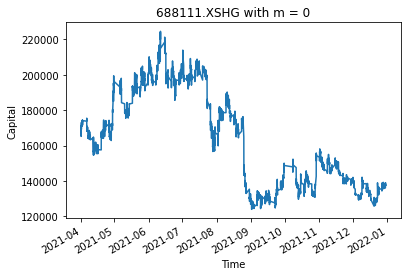

0.005012936610608021
胜率： 0.23275862068965517
stock: 688188.XSHG m= 0.018


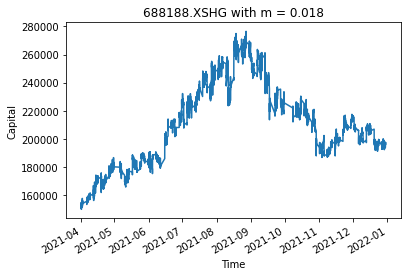

0.002647962483829237
胜率： 0.3953488372093023
stock: 688008.XSHG m= 0.018


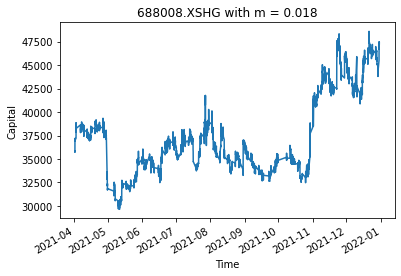

0.0008893919793014231
胜率： 0.5151515151515151
stock: 688321.XSHG m= 0.018


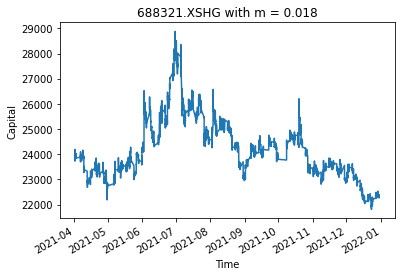

0.3742318887451488
胜率： 0.5000571624556991
stock: 688266.XSHG m= 0


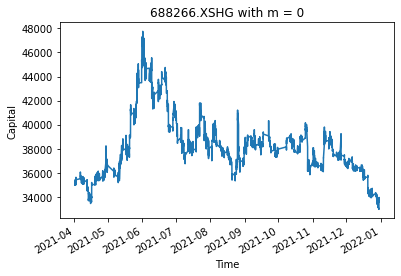

0.003678848641655886
胜率： 0.55
stock: 688088.XSHG m= 0.016


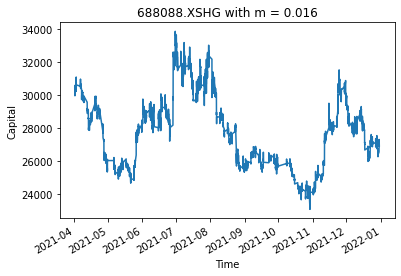

0.01364408150064683
胜率： 0.4947089947089947
stock: 688016.XSHG m= 0.012


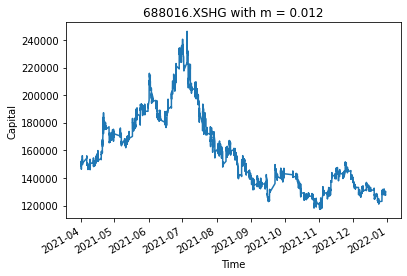

0.004062904269081501
胜率： 0.47560975609756095
stock: 688363.XSHG m= 0.018


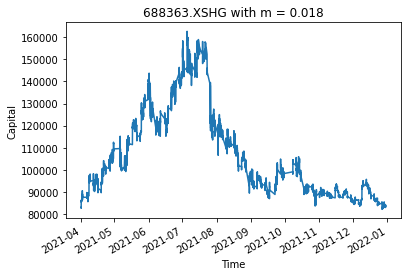

0.007721539456662354
胜率： 0.4558139534883721
stock: 688116.XSHG m= 0.018


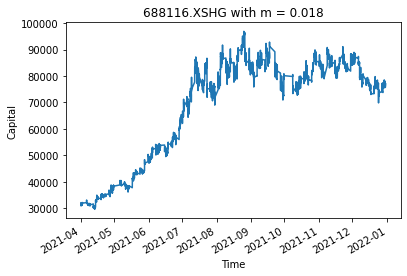

0.013987710219922381
胜率： 0.5358361774744027
stock: 688208.XSHG m= 0.012


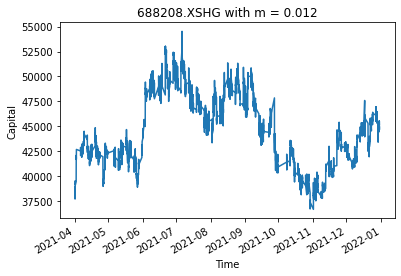

0.0029107373868046574
胜率： 0.43010752688172044
stock: 688002.XSHG m= 0.018


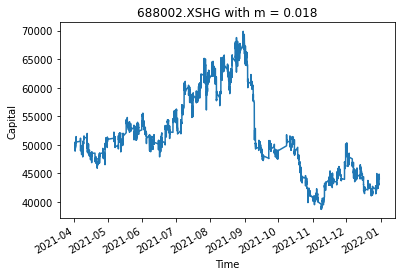

0.005619340232858991
胜率： 0.40522875816993464
stock: 688122.XSHG m= 0.016


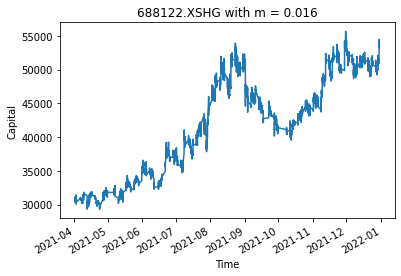

0.008004527813712808
胜率： 0.5384615384615384
stock: 688139.XSHG m= 0.014


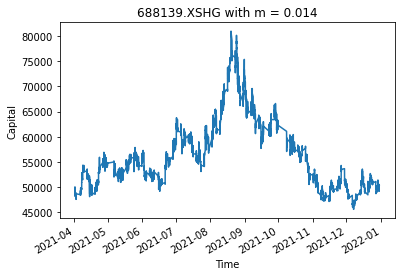

0.004426746442432083
胜率： 0.3937007874015748
stock: 688099.XSHG m= 0.018


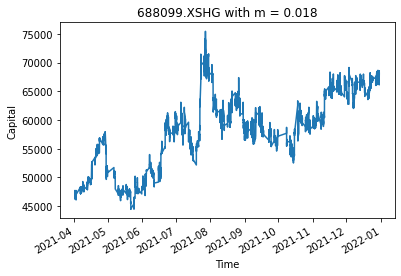

0.003274579560155239
胜率： 0.49295774647887325
stock: 688278.XSHG m= 0.016


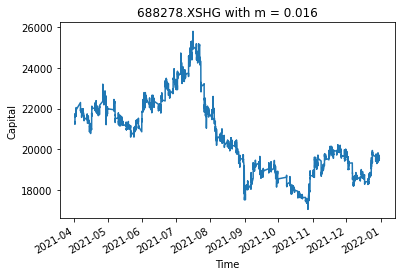

KeyboardInterrupt: 

In [7]:
for stock in stock_list:
    aa = triply_filter(stock)
    best_m = aa.train_func()  # 从0 到 0.018 中检索最优的参数m值，可以不运行此函数直接将想要的参数m值代入下面的trade_func函数中
#     print(best_m)
    win_rate, trade_df = aa.trade_func(m = best_m, time_begin = '2021-04-01', time_end = '2022-01-01')
    
    date_num = len(pd.Series(trade_df.index.date).unique())
    trade_df[' '] = None
    trade_df['名称'] = None
    trade_df.loc[trade_df.index[0], '名称'] = '年化收益率'
    trade_df.loc[trade_df.index[1], '名称'] = '股票本身年化收益率'
    trade_df.loc[trade_df.index[2], '名称'] = '回测开始日期'
    trade_df.loc[trade_df.index[3], '名称'] = '回测结束日期'
    trade_df.loc[trade_df.index[4], '名称'] = '胜率'
    trade_df.loc[trade_df.index[5], '名称'] = '总损益'
    trade_df.loc[trade_df.index[7], '名称'] = '股票名称'
    trade_df.loc[trade_df.index[8], '名称'] = 'date'
    trade_df.loc[trade_df.index[9], '名称'] = 'signal'
    trade_df.loc[trade_df.index[10], '名称'] = 'close'
    trade_df.loc[trade_df.index[11], '名称'] = 'cash'
    trade_df.loc[trade_df.index[12], '名称'] = 'stock_shares'
    trade_df.loc[trade_df.index[13], '名称'] = 'total_capacity'
    trade_df['统计'] = None
    trade_df.loc[trade_df.index[0], '统计'] = trade_df.total_capacity[-1] / trade_df.total_capacity[0] /date_num*365 - 1
    trade_df.loc[trade_df.index[1], '统计'] = trade_df.close[-1] / trade_df.close[0] /date_num*365 - 1
    trade_df.loc[trade_df.index[2], '统计'] = trade_df.index.date[0]
    trade_df.loc[trade_df.index[3], '统计'] = trade_df.index.date[-1]
    trade_df.loc[trade_df.index[4], '统计'] = win_rate
    trade_df.loc[trade_df.index[5], '统计'] = trade_df.total_capacity[-1] - trade_df.total_capacity[0]
    trade_df.loc[trade_df.index[7], '统计'] = stock
    trade_df.loc[trade_df.index[8], '统计'] = '时间（分钟级）'
    trade_df.loc[trade_df.index[9], '统计'] = '交易信号（1：买；-1：卖；0：不交易）'
    trade_df.loc[trade_df.index[10], '统计'] = '每分钟的收盘价'
    trade_df.loc[trade_df.index[11], '统计'] = '现金数额（初始为5,000）'
    trade_df.loc[trade_df.index[12], '统计'] = '持有股份数（每次信号出现时买卖1股，初始为500）'
    trade_df.loc[trade_df.index[13], '统计'] = '交易损益（现金数额 + 持有股份数*当前收盘价）'

    trade_df.to_csv(stock+'输出结果.csv',encoding="utf_8_sig")

In [ ]:
if __name__ == '__main__':
    stock = '688005.XSHG'
    aa = triply_filter(stock)
#     best_m = aa.train_func()  # 从0 到 0.08 中检索最优的参数m值，可以不运行此函数直接将想要的参数m值代入下面的trade_func函数中
    trade_list = aa.trade_func(m = 0.6, time_begin = '2021-04-01')